# ***Les couleurs de cheveux***

## **Enjeu :**
*Quatre individus se tiennent en file sur des estrades.*
*La teinte de leurs cheveux est soit orange ou indigo.*
*Chaque personne observe les cheveux devant elle et ne peut prononcer qu'un mot : orange ou indigo.*

## La statégie :
En cas de nombre pair d'une courleur, la personne personne dit la couleur opposée.

### A noter :
- **Qubit 0 :** Pair ou "Orange"
- **Qubit 1 :** Impair ou "Indigo"

- **QBit 0 :** Alice
- **QBit 1 :** Bob
- **QBit 2 :** Charlie
- **QBit 3 :** Dalia

- **QBit 4 :** Raisonement d'Alice
- **QBit 5 :** Raisonement de Bob
- **QBit 6 :** Raisonement de Charlie
- **QBit 7 :** Raisonement de Dalia

#### Importation des librairies

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

#### Initialisation

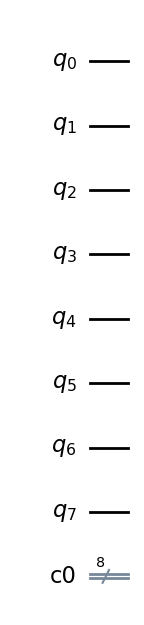

In [2]:
circ_enigme=QuantumCircuit(8)
classicalRegister=ClassicalRegister(8)
circ_enigme.add_register(classicalRegister)
circ_enigme.draw(output="mpl")

#### Création des qubits des joueurs
- Applique la porte Hadamard sur les quatre premiers qubits, qui représentent les personnes (Alice, Bob, Charlie, Dalia).

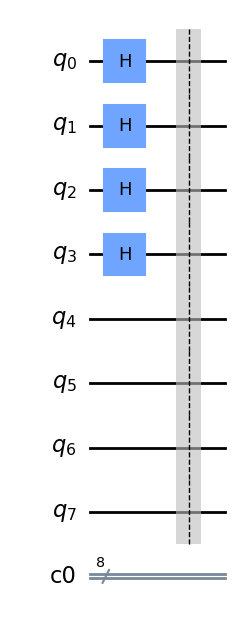

In [3]:
circ_enigme.h(0)
circ_enigme.h(1)
circ_enigme.h(2)
circ_enigme.h(3)
circ_enigme.barrier()
circ_enigme.draw(output="mpl")

#### Création des qubits de raisonnement

La porte CNOT (CX) est utilisée pour comparer les couleurs des cheveux de chaque joueur.
Si la couleur est la même, le qubit de raisonnement est mis à 0.
Si la couleur est différente, le qubit de raisonnement est mis à 1.

##### Alice (Formulation de la réponse)
- Utilisations les portes CX pour calculer le nombre pair/impair de couleurs de cheveux Indigo

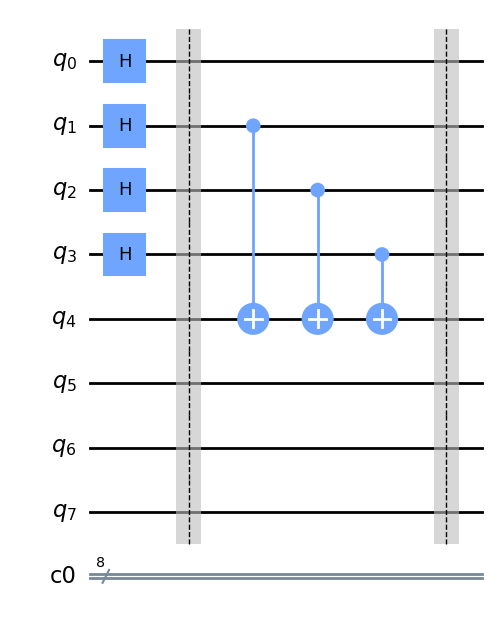

In [4]:
circ_enigme.cx(1,4)
circ_enigme.cx(2,4)
circ_enigme.cx(3,4)
circ_enigme.barrier()
circ_enigme.draw(output="mpl")

##### Alice ( Prise en compte de la réponse par les autres joueurs)
- Utilisations les portes CX pour copier le resultat (Prendre en compte) d'Alice chez les autres

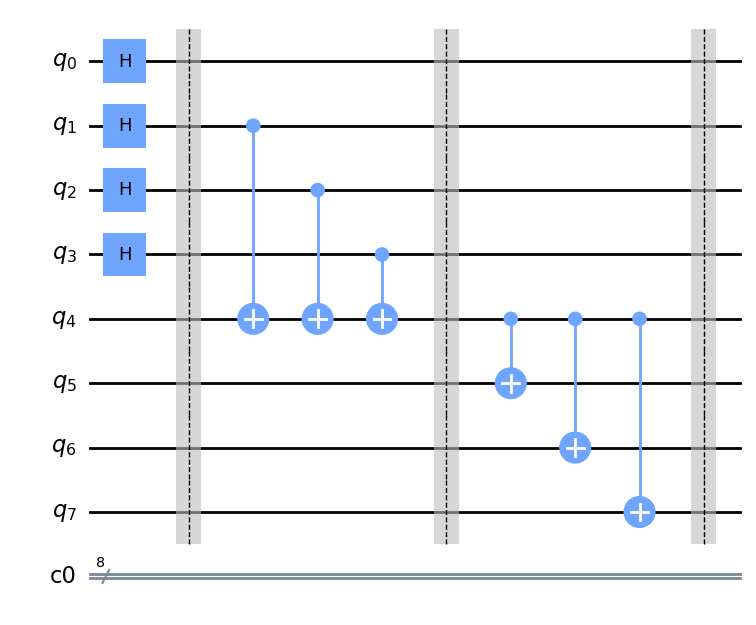

In [5]:
circ_enigme.cx(4,5)
circ_enigme.cx(4,6)
circ_enigme.cx(4,7)
circ_enigme.barrier()
circ_enigme.draw(output="mpl")

##### Bob (Formulation de la réponse)
- Utilisations les portes CX pour calculer le nombre pair/impair de couleurs de cheveux Indigo

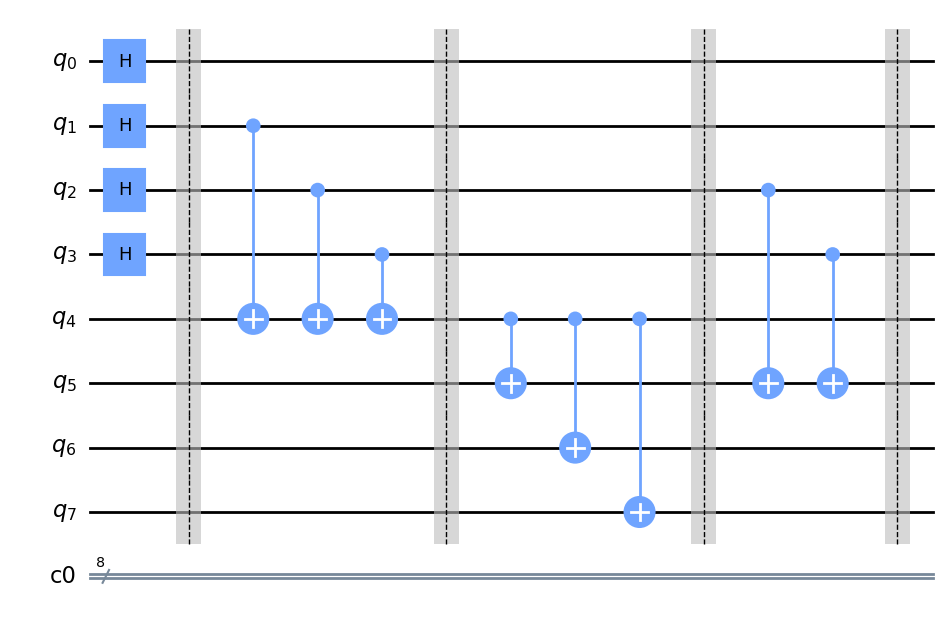

In [6]:
circ_enigme.cx(2,5)
circ_enigme.cx(3,5)
circ_enigme.barrier()
circ_enigme.draw(output="mpl")

##### Bob ( Prise en compte de la réponse par les autres joueurs)
- Utilisations les portes CX pour copier le resultat (Prendre en compte) de Bob chez les autres

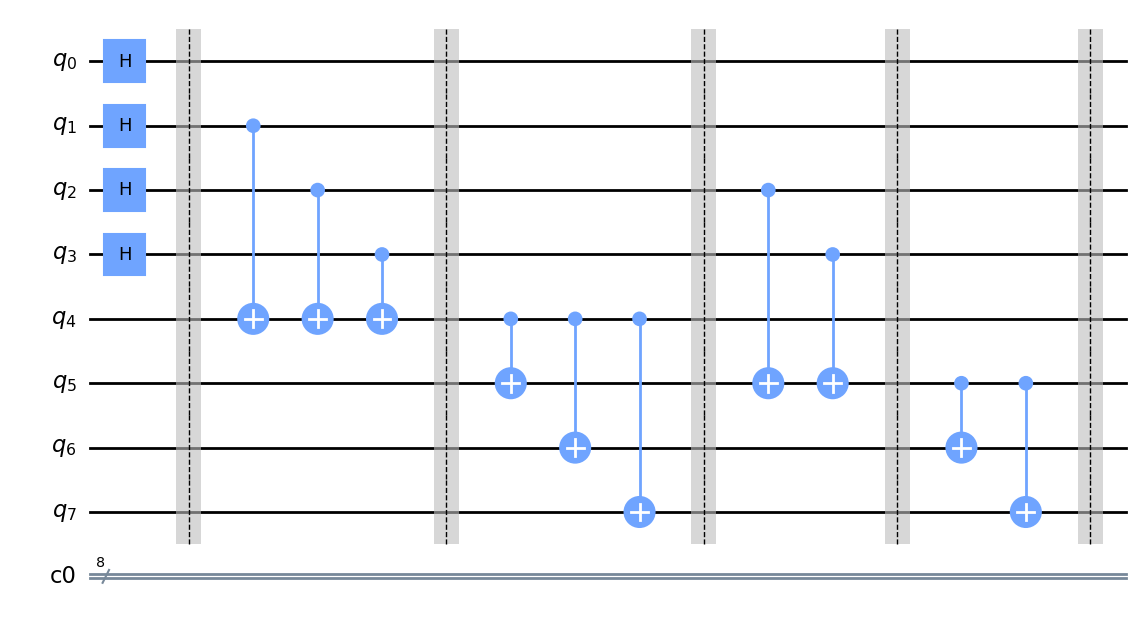

In [7]:
circ_enigme.cx(5,6)
circ_enigme.cx(5,7)
circ_enigme.barrier()
circ_enigme.draw(output="mpl")

##### Charlie (Formulation de la réponse)
- Utilisations les portes CX pour copier le resultat (Prendre en compte) de Charlie chez les autres

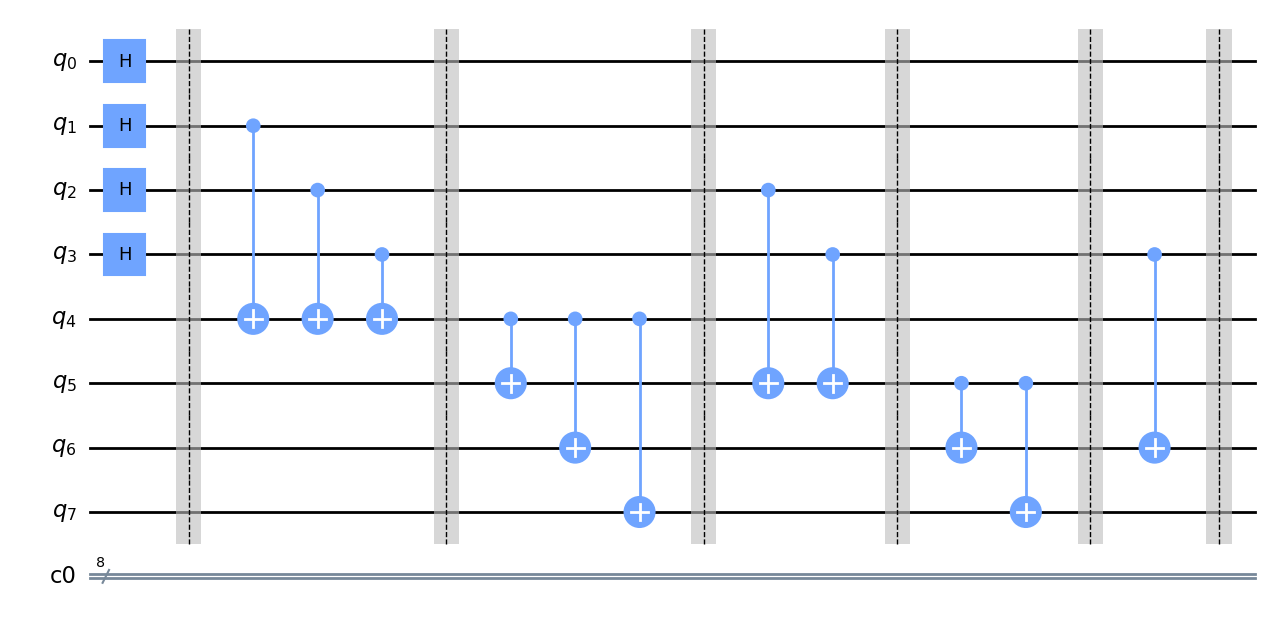

In [8]:
circ_enigme.cx(3,6)
circ_enigme.barrier()
circ_enigme.draw(output="mpl")

##### Dalia ( Prise en compte de la réponse de Charlie et formulation de sa réponse)
- Utilisations les portes CX pour copier le resultat (Prendre en compte) de Charlie chez les Dalia et donc engendrer la reponse finale

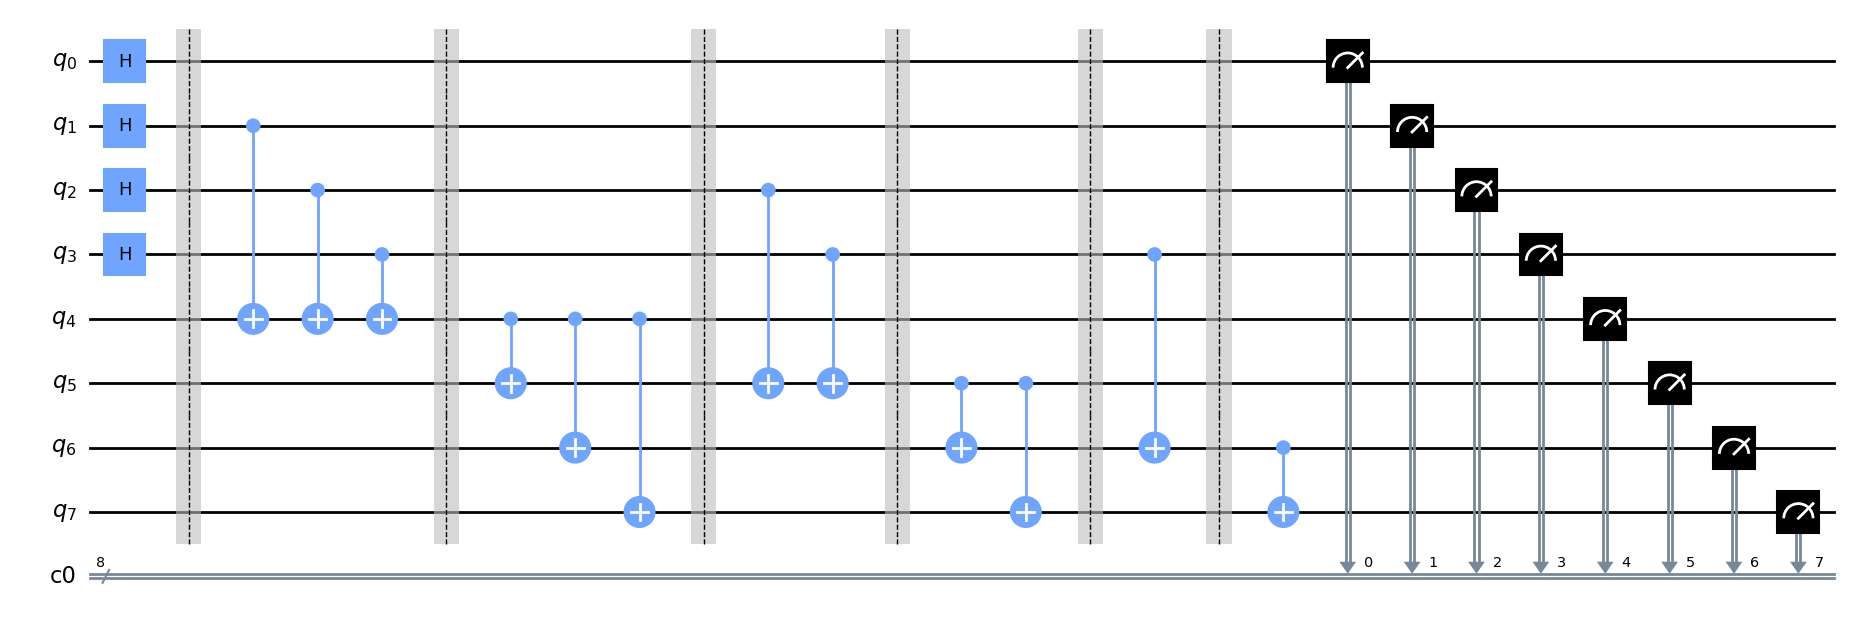

In [9]:
circ_enigme.cx(6,7)
circ_enigme.measure(range(8), range(8))
circ_enigme.draw("mpl", fold=-1)

## Rendu des calculs

In [10]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circ_enigme, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result_sim = job.result()

## State city

In [ ]:
from qiskit.visualization import plot_state_city
outputstate = result_sim.get_statevector(circ_enigme, decimals=3)
plot_state_city(outputstate)

## Histogramme

In [ ]:
resultats = result_sim.get_counts(compiled_circuit)
plot_histogram(resultats, title='Répartitions des teintures', bar_labels=False)

In [ ]:
import heapq

highest = heapq.nlargest(2, resultats.items(), key=lambda x: x[1])
res = []
for values in highest:
    str = values[0][::-1][:4]
    zeros = str.count('0')
    ones = str.count('1')
    
    res.append((zeros, ones, values[1]))
print(
    f"Interpretation des resultats"
    f"\n\tLes résultats dans le tableau montrent à quelle fréquence certaines combinaisons de couleurs ont été trouvées."
    f"\n\tSi une combinaison particulière apparaît plus souvent, cela signifie qu'il est plus probable que les cheveux soient de ces couleurs-là."
    f"\n\tOn peut voir ici que les 2 combinaisons probables sont :"
)
for r in res:
    print(f"\n\t\tNombre d'apparation: {r[2]}, Nombre de chevelures Oranges: {r[0]}, Nonbres de chevelures Indigo: {r[1]}")